In [ ]:
import pandas as pd
import numpy as np
import sklearn

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
data=load_boston()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
data.filename

'/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/boston_house_prices.csv'

In [ ]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [ ]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]

In [ ]:
df["Price"]=data.target

In [ ]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  Price
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.loc[:,"CRIM":"LSTAT"]
Y=df.loc[:,["Price"]]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
X.shape,Y.shape

((506, 13), (506, 1))

In [ ]:
x_train.shape,y_train.shape

((404, 13), (404, 1))

In [ ]:
x_test.shape,y_test.shape

((102, 13), (102, 1))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
?LinearRegression

In [ ]:
lr = LinearRegression()  # hyper parameter

In [ ]:
lr.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.coef_ # calculate m1,m2,m3

array([[-9.81698973e-02,  4.97969511e-02,  4.36422458e-02,
         2.81972464e+00, -1.95259909e+01,  3.89100414e+00,
        -2.09096881e-03, -1.54562862e+00,  2.94209323e-01,
        -1.19305619e-02, -9.93402375e-01,  9.21030067e-03,
        -5.33964699e-01]])

In [ ]:
# Price =CRIM*m1 + ZN* m2 + INDUS * m3 + CHAS *m4...LSTAT*m13+C

In [ ]:
lr.intercept_ # C value

array([37.95790689])

In [ ]:
## Testing Phase
#x_test,y_test

#x_test-->[Model]-->y_pred
# Compare y_pred vs y_test

In [ ]:
[f"{str(m)}{x} +" for x, m in zip(x_train.columns, lr.coef_[0])]# + f"{str(lr.intercept_[0])}"

['-0.09816989728033401CRIM +',
 '0.04979695113699263ZN +',
 '0.043642245818352146INDUS +',
 '2.819724640622155CHAS +',
 '-19.52599092125727NOX +',
 '3.891004135040024RM +',
 '-0.002090968812874088AGE +',
 '-1.545628624084585DIS +',
 '0.29420932326549354RAD +',
 '-0.011930561860003304TAX +',
 '-0.9934023747210856PTRATIO +',
 '0.009210300670425903B +',
 '-0.5339646990438273LSTAT +']

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(range(len(y_pred)),y_pred)
plt.scatter(range(len(y_test)),y_test)

In [ ]:
y_test.reset_index(drop=True)

Price
0     13.2
1     10.4
2      9.7
3     10.2
4     17.8
..     ...
97    22.9
98    18.1
99    37.9
100   23.7
101   15.6

[102 rows x 1 columns]

In [ ]:
y_pred

array([[ 8.48372883],
       [15.15665851],
       [ 9.59144328],
       [ 6.12797447],
       [16.52686336],
       [27.43511894],
       [15.63910142],
       [25.16405795],
       [23.10325691],
       [18.98920677],
       [33.91638521],
       [12.78459658],
       [25.10044237],
       [ 3.01396573],
       [29.43102768],
       [21.96012899],
       [11.08943738],
       [20.88013524],
       [25.52672515],
       [16.38080719],
       [33.23550689],
       [24.68342887],
       [45.5385291 ],
       [13.14635266],
       [20.18089816],
       [19.48421639],
       [20.94807472],
       [19.47121482],
       [16.86766083],
       [ 6.84500102],
       [23.61211637],
       [22.60850296],
       [14.60535881],
       [30.65898587],
       [20.8654168 ],
       [19.05298092],
       [12.17999949],
       [13.61320354],
       [18.80315951],
       [18.43505513],
       [26.2296312 ],
       [21.49500134],
       [18.7083237 ],
       [24.99396155],
       [20.05037646],
       [27

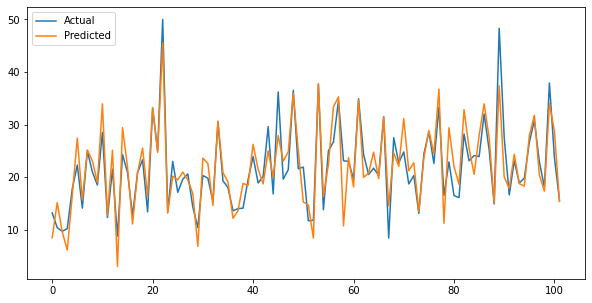

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test.reset_index(drop=True), label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()

In [ ]:
# y_pred1   | y_test1

# journey of RMSE
error = y_test - y_pred
error.mean()

Price   -0.32148
dtype: float64

In [ ]:
error = abs(y_test - y_pred)
error.mean()

Price    2.692817
dtype: float64

In [ ]:
error = (y_test - y_pred)**2
error.mean()

Price    12.702446
dtype: float64

In [ ]:
error = (y_test - y_pred)**2
(error.mean())**0.5    #square root

Price    3.564049
dtype: float64

In [ ]:
# R2 
"""
R2 = Sum((Actual - Predicted)**2)/Sum((Actual - Mean)**2)
"""

'\nR2 = Sum(Predicted - Mean)**2/Sum(Actual - Mean)**2\n'

In [ ]:
# 0 < R2 < 1
# R2 ==1 - Best model 
# R2 ==0 - Worst model

In [ ]:
((y_test - y_pred)**2).sum()

Price    1295.649443
dtype: float64

In [ ]:
((y_test - y_test.mean()[0])**2).sum()

Price    6130.398431
dtype: float64

In [ ]:
((y_test - y_pred)**2).sum() / ((y_test - y_test.mean()[0])**2).sum()

Price    0.211348
dtype: float64

In [ ]:
1 - (((y_test - y_pred)**2).sum() / ((y_test - y_test.mean()[0])**2).sum())

Price    0.788652
dtype: float64

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test.reset_index(drop=True), y_pred)

0.7886516744751546

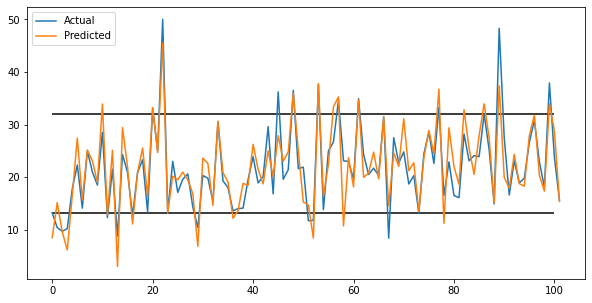

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test.reset_index(drop=True), label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.hlines(y=np.percentile(y_test, 10), xmin=0, xmax=100)
plt.hlines(y=np.percentile(y_test, 90), xmin=0, xmax=100)


In [ ]:
# 9, 10, 11, 12, 12, 11, 13, 9, 10, 10, 11 ,28 , 11, 12 

In [76]:
import pickle as pkl

In [78]:
pkl.dump(lr, open("linear_model.pkl", "wb"))

In [79]:
# Read back - 

In [80]:
model = pkl.load(open("linear_model.pkl", "rb"))

In [81]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
model.intercept_

array([37.95790689])

In [83]:
# POST http://localhost:5000/lrmodel/predict 

In [ ]:
# Logistic Regression -> This is a classification algorithm!!! 

# UseCase - We need to predict the occurance of a Event E1, whther it will happen or not ! (classification) [Y/N]

# When you use Logistic Regression it actually regress the probability of that even happening
# lets assume that the probability regressed is 0.7     [0, 1]

# 0 - no 
# 1 - yes 

# 0.7 is close to 1 as compared to 0 - so we will take 1 
# and 0.7 probability can be converted to a classification answer of YES 